In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data_processed.csv")
df.head()

,sex,Age,Married,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_salary,incoming_own_farm,...,11 family members,12 family members,2 family members,3 family members,4 family members,5 family members,6 family members,7 family members,8 family members,9 family members
0,1,28,1,28912201,22861940,23399979,26692283,28203066,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,23,1,28912201,22861940,23399979,26692283,28203066,0,0,...,0,0,0,0,0,1,0,0,0,0
2,1,22,1,28912201,22861940,23399979,26692283,28203066,0,0,...,0,0,0,0,0,1,0,0,0,0
3,1,27,1,52667108,19698904,49647648,397715,44042267,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,59,0,82606287,17352654,23399979,80877619,74503502,1,0,...,0,0,0,0,0,0,1,0,0,0


In [3]:
# Genero datos de entrenamiento y test
X = df.drop('depressed',axis=1) # Variable independiente
y = df['depressed'] # Variable dependiente

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=23)

In [4]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

over_sampler = RandomOverSampler(random_state=42)
X_res, y_res = over_sampler.fit_resample(X_train, y_train)
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 933, 1: 933})
Testing target statistics: Counter({0: 241, 1: 41})


## Decision Tree

In [5]:
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier(max_depth = 3)
#decision_tree = tree.DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 6, min_samples_leaf = 3, max_depth= 3)
decision_tree.fit(X_res, y_res)

DecisionTreeClassifier(max_depth=3)

In [6]:
# Realizamos la prediccion
y_pred = decision_tree.predict(X_test)

In [7]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

acc_dt = metrics.accuracy_score(y_test,y_pred)
acc_dt #0.8439716312056738

0.7375886524822695

In [8]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[198  43]
 [ 31  10]]


In [9]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       241
           1       0.19      0.24      0.21        41

    accuracy                           0.74       282
   macro avg       0.53      0.53      0.53       282
weighted avg       0.77      0.74      0.75       282



[Text(0.5, 0.875, 'X[1] <= 47.5\ngini = 0.5\nsamples = 1866\nvalue = [933, 933]'),
 Text(0.25, 0.625, 'X[1] <= 43.5\ngini = 0.497\nsamples = 1471\nvalue = [794, 677]'),
 Text(0.125, 0.375, 'X[7] <= 87684148.0\ngini = 0.499\nsamples = 1414\nvalue = [739, 675]'),
 Text(0.0625, 0.125, 'gini = 0.496\nsamples = 1325\nvalue = [719, 606]'),
 Text(0.1875, 0.125, 'gini = 0.348\nsamples = 89\nvalue = [20, 69]'),
 Text(0.375, 0.375, 'X[5] <= 45643804.0\ngini = 0.068\nsamples = 57\nvalue = [55, 2]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 53\nvalue = [53, 0]'),
 Text(0.4375, 0.125, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.75, 0.625, 'X[5] <= 45020540.0\ngini = 0.456\nsamples = 395\nvalue = [139, 256]'),
 Text(0.625, 0.375, 'X[18] <= 0.5\ngini = 0.44\nsamples = 379\nvalue = [124, 255]'),
 Text(0.5625, 0.125, 'gini = 0.412\nsamples = 341\nvalue = [99, 242]'),
 Text(0.6875, 0.125, 'gini = 0.45\nsamples = 38\nvalue = [25, 13]'),
 Text(0.875, 0.375, 'X[54] <= 0.5\ngini = 0.117\nsamples 

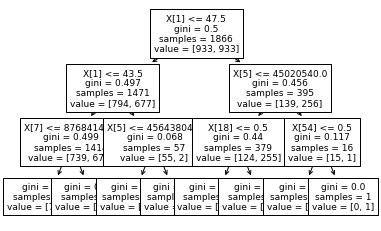

In [10]:
tree.plot_tree(decision_tree, fontsize=9) 